In [54]:
import numpy as np
import matplotlib.pyplot as plt
from processclass import Experiment2D
from pso_optimizer_class import PSO_Optimizer
from analyse import deposit_fwhm, get_peak
from program import loop_param, plot, plot_freex, plot_freey

In [75]:
pr = Experiment2D()
# Initializing model
pr.n0 = 2.7  # 1/nm^2
pr.F = 730.0  # 1/nm^2/s
pr.s = 1.0
pr.V = 0.05  # nm^3
pr.tau = 200e-6  # s
pr.D = 1e7  # nm^2/s
pr.sigma = 0.02  # nm^2
pr.f0 = 1.0e4
pr.fwhm =2.5  # nm
pr.order = 1
pr.step = 0.2  # nm

4798it [00:00, 42087.95it/s]


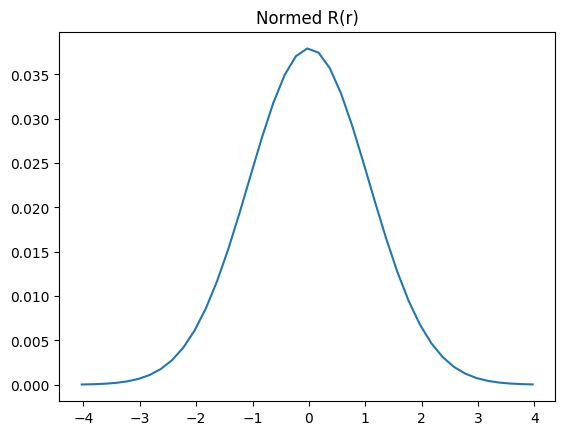

In [76]:
pr.solve_steady_state()
R = pr.R
r = pr.r
fig,ax = plt.subplots()
plt.plot(r, R)
plt.title('Normed R(r)')
params = pr.__dict__
[params.pop(key) for key in ['_R', 'r', 'f', 'n']]
fname = 'example_curve2.txt'
with open(fname, mode='w') as f:
    f.write('r(radius)\tR(growth rate)\n')
    for i in range(R.size):
        f.write(f'{r[i]}\t{R[i]}\n')
    f.write('\nParameters used:\n')
    for key, val in params.items():
        f.write(f'{key}:{val}\n')


In [57]:
from analyse import get_peak

r_max, R_max = get_peak(r, R)
print(f'r_max: {r_max}, R_max: {R_max}')

r_max: [-0.02340713], R_max: [0.03753021]


In [58]:
2*r_max.max()/pr.fwhm

-0.0013375503910862919

In [59]:
fwhm = deposit_fwhm(r, R)
fwhm

35.15318573631248

In [60]:
fwhm/pr.fwhm

1.0043767353232138

In [61]:
pr.print_process_attributes()

kd: 5470
kr: 5270.4
nd: 1.334e-01
nr: 0.1385
tau_in: 1.828e-04
tau_out: 1.897e-04
tau_r: 1.04
p_in: 42.755465
p_out: 43.559154
p_i: 2.443169
p_o: 2.489
phi1: 1.013
phi2: 1.056



1000it [00:00, 55561.05it/s]
4798it [00:00, 47979.59it/s]
14468it [00:00, 48280.78it/s]
44111it [00:00, 55843.10it/s]
76993it [00:01, 49037.45it/s]
109966it [00:02, 44946.97it/s]
136875it [00:02, 46051.69it/s]
157229it [00:03, 45899.49it/s]
171139it [00:04, 42034.59it/s]
179242it [00:04, 41783.24it/s]
181390it [00:04, 39479.46it/s]
179935it [00:04, 39417.27it/s]
175179it [00:04, 35964.66it/s]
168060it [00:04, 34106.72it/s]
159223it [00:04, 33768.98it/s]
151668it [00:04, 33576.76it/s]
145972it [00:04, 33550.89it/s]
142856it [00:04, 32929.47it/s]
141617it [00:04, 31456.90it/s]
140811it [00:04, 30599.44it/s]
141058it [00:04, 29944.22it/s]


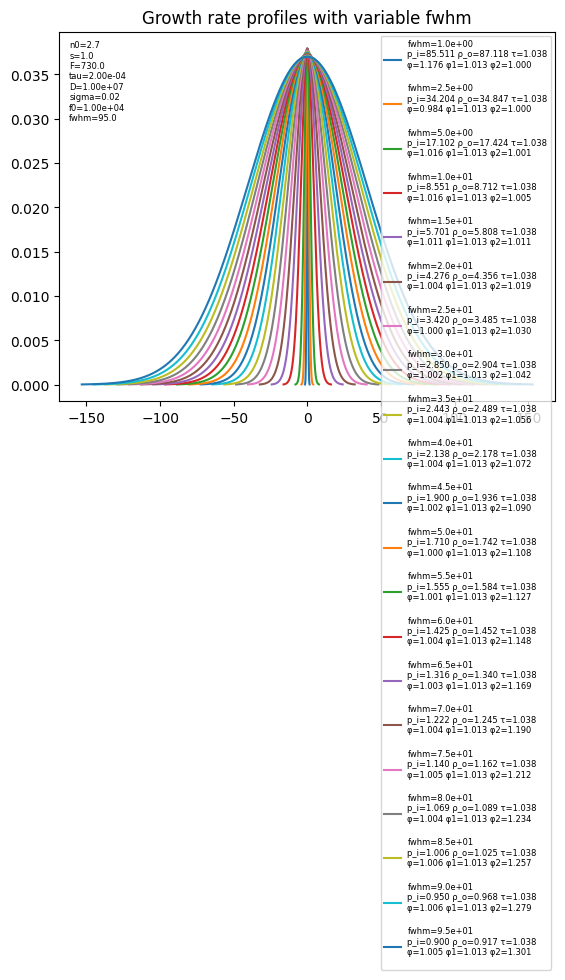

In [62]:
vals = [1, 2.5, *np.arange(5, 100, 5)]
param_name = 'fwhm'
exps = loop_param(param_name, vals, pr)

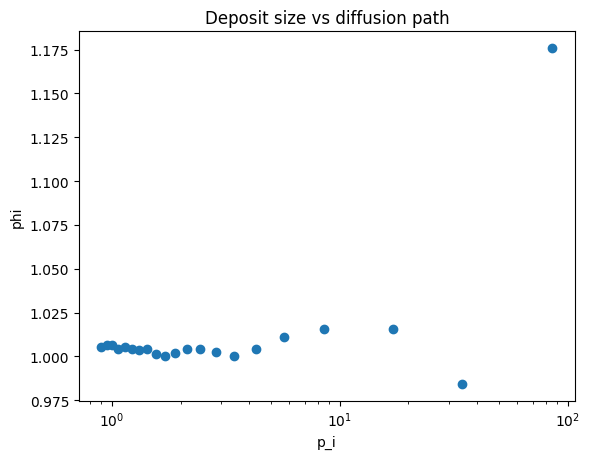

In [63]:
fwhm_d=np.array([deposit_fwhm(exp.r, exp.R) for exp in exps])
fwhm_b = np.array(([exp.fwhm for exp in exps]))
phi = fwhm_d/fwhm_b
plot_freey(exps, 'p_i', phi, 'phi', 'Deposit size vs diffusion path', logx=True)

C:\Users\sandr\PycharmProjects\febid_2d\program.py:113: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  line = ax.scatter(x, y, c=color, cmap='magma')


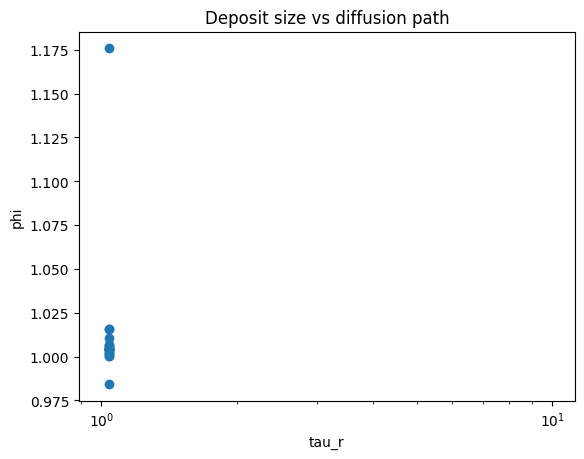

In [107]:
fwhm_d=np.array([deposit_fwhm(exp.r, exp.R) for exp in exps])
fwhm_b = np.array(([exp.fwhm for exp in exps]))
phi = fwhm_d/fwhm_b
plot_freey(exps, 'tau_r', phi, 'phi', 'Deposit size vs diffusion path', logx=True)

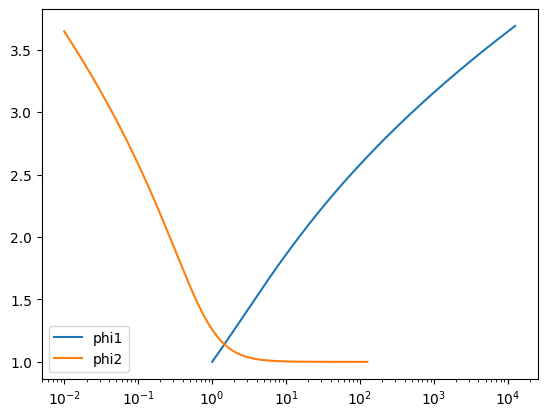

In [106]:
p_i = np.power(10, np.arange(-2,2.1,0.001))
tau_r = np.power(10, np.arange(0,4.1,0.001))
phi1 = np.sqrt(np.log2(1+tau_r))
phi2 = np.sqrt(np.log2(2 + p_i**-2))
fig, ax = plt.subplots()
_ = ax.plot(tau_r, phi1, label='phi1')
_ = ax.plot(p_i, phi2, label='phi2')
ax.semilogx()
plt.legend()
plt.show()

In [64]:
# from processclass2 import PseudoExperiment2D
#
# ppr = PseudoExperiment2D()
# ppr.n0 = 2.7  # 1/nm^2
# ppr.F = 730. 0  # 1/nm^2/s
# ppr.s = 1.0
# ppr.V = 0.05  # nm^3
# ppr.tau = 200e-6  # s
# ppr.D = 12e5  # nm^2/s
# ppr.sigma = 0.02  # nm^2
# ppr.f0 = 1.0e7
# ppr.fwhm = 50  # nm
# ppr.order = 1
# ppr.step = 0.5  # nm
#
# ppr.tau_r = 400
# ppr.p_o = 100
# ppr.dt = 1e-8
# bonds = ppr.get_bonds()*2
# r_ppr = ppr.get_grid(bonds)
# ppr.solve_steady_state(r_ppr, eps=1e-7)
# fig,ax = plt.subplots()
# plt.plot(pr.r, pr.R)